# Pymaceuticals Inc.
---

### Analysis

- This data analysis tracks a group of 248 mice that have squamous cell carcinoma, which is a form of skin cancer. Each mouse recieved treatments over the course of 45 days from a range of drug regimens that includes a drug named Capomulin. Of the mice used, 49% were female, and 51% were male. Overall, Capomulin seemed to perform well, and in regards to shrinking the tumor size, it appears to have beaten every drug regimen except Ramicane. Ramicane has a slightly lower mean tumor volume and the median, variance and standard deviation indicate that the average tumor volume is a bit more accurate than the Capomulin regimen. Based on this data it appears the Ramicane drug regimen has performed better in reducing the size of the tumors. It is important to note that there is a strong, positive correlation between weight and tumor volume. I believe further analysis is needed with regards to the weight of each mouse used in each drug regimen. It appears that the heavier a mouse is, the larger the tumor volume. To make this data more accurate, we may need to look at the reduction in tumor volume as a percentage. We may also need to make sure mouse weights are evenly distributed throughout each drug regimen. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single DataFrame
#mouse_study_combined = mouse_metadata.merge(study_results, how='right')
mouse_study_combined = pd.merge(study_results, mouse_metadata, how="left", on=['Mouse ID', 'Mouse ID'])

# Display the data table for preview
mouse_study_combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
idcount = mouse_study_combined["Mouse ID"].count()
idcount

1893

In [3]:
# Checking the number of mice.

unique_mice = mouse_study_combined["Mouse ID"].unique()
number_mice = len(unique_mice)
number_mice

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint --# - array(['g989'], dtype=object)
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

id_duplicate = mouse_study_combined[mouse_study_combined.duplicated(["Mouse ID", "Timepoint"], keep=False)]
id = id_duplicate["Mouse ID"].unique()
id


array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_data = mouse_study_combined[(mouse_study_combined["Mouse ID"] == "g989")]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mouse_study_combined_clean = mouse_study_combined.loc[mouse_study_combined["Mouse ID"] != 'g989']
mouse_study_combined_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
unique_mice1 = mouse_study_combined_clean["Mouse ID"].unique()
number_mice1 = len(unique_mice1)
number_mice1

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_tumor_volume = mouse_study_combined_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_volume = mouse_study_combined_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_vol_var = mouse_study_combined_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_std_dev = mouse_study_combined_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_std_err = mouse_study_combined_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.

sum_stats_basic = pd.DataFrame({"Mean Tumor Volume": mean_tumor_volume, "Median Tumor Volume": median_tumor_volume, "Tumor Volume Variance": tumor_vol_var, "Tumor Volume Std. Dev.": tumor_std_dev, "Tumor Volume Std. Err.": tumor_std_err})
sum_stats_basic

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

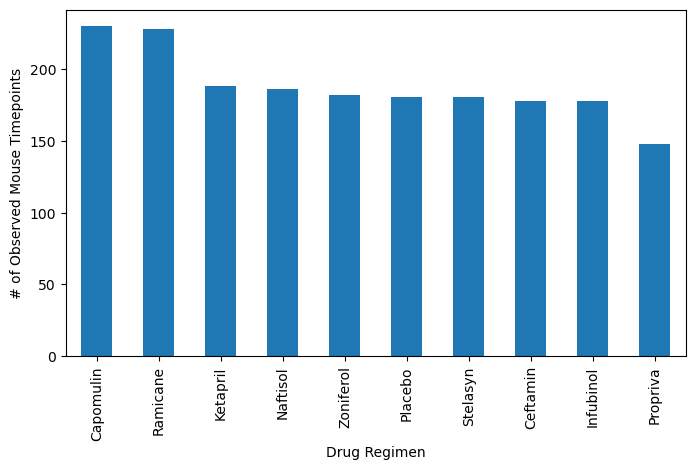

<Figure size 640x480 with 0 Axes>

In [59]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
time_drug = mouse_study_combined_clean.groupby("Drug Regimen")["Timepoint"].count().sort_values(ascending=False)


time_drug.plot(kind="bar", figsize=(8,4.5))
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()
plt.tight_layout()

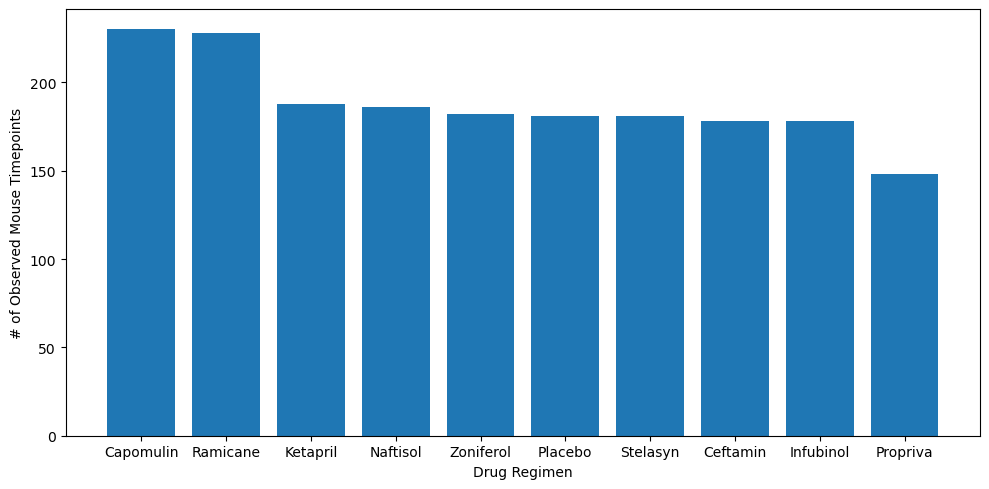

In [58]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# create dataset
timepoints = [230, 228, 188, 186, 182, 181, 181, 178, 178, 148]
drug = ("Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Ceftamin", "Infubinol", "Propriva")
 
# Choose the position of each barplots on the x-axis
x_pos = [0,1,2,3,4, 5, 6, 7, 8, 9]

#adjust size of the chart to fit x axis labels.
plt.figure(figsize=(10,5))
 
# Create bars
plt.bar(x_pos, timepoints,)
 
# Create names on the x-axis
plt.xticks(x_pos, drug)
 
# Show graphic
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlabel("Drug Regimen")
plt.tight_layout()
plt.show()


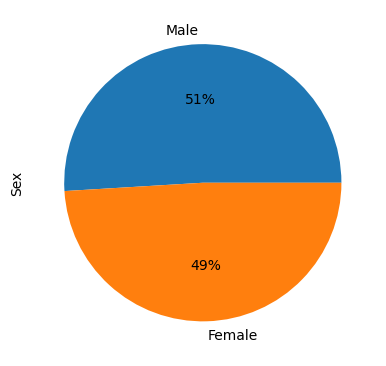

<Figure size 640x480 with 0 Axes>

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex = mouse_study_combined_clean['Sex'].value_counts()

sex.plot(kind="pie", figsize=(8,4.5), autopct='%1.0f%%')
plt.ylabel("Sex")
plt.show()
plt.tight_layout()



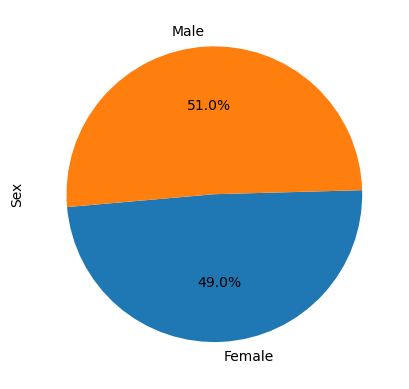

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female", "Male"]
sizes = [922, 958]
colors = ["tab:blue", "tab:orange"]

plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=False, startangle=185)
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_time_points = mouse_study_combined_clean.groupby("Mouse ID")["Timepoint"].max()
#greatest_time_points.head()

greatest_time_points = greatest_time_points.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

new_df_mouse_time = pd.merge(greatest_time_points, mouse_study_combined_clean, how="left", on=['Mouse ID', 'Timepoint'])

new_df_mouse_time


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_regimens:
    final_tumor_volume = new_df_mouse_time[new_df_mouse_time['Drug Regimen'] == drug]["Tumor Volume (mm3)"]
    tumor_vol_data.append(final_tumor_volume)


    quartiles = final_tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_volume.loc[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")




Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


([<matplotlib.axis.XTick at 0x248a43db790>,
 [Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Ramicane'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Ceftamin')])

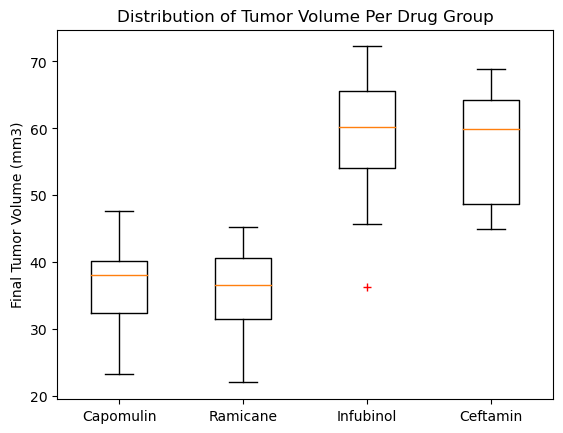

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.title('Distribution of Tumor Volume Per Drug Group')
plt.ylabel('Final Tumor Volume (mm3)')


plt.boxplot(tumor_vol_data, sym='r+')

plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])


## Line and Scatter Plots

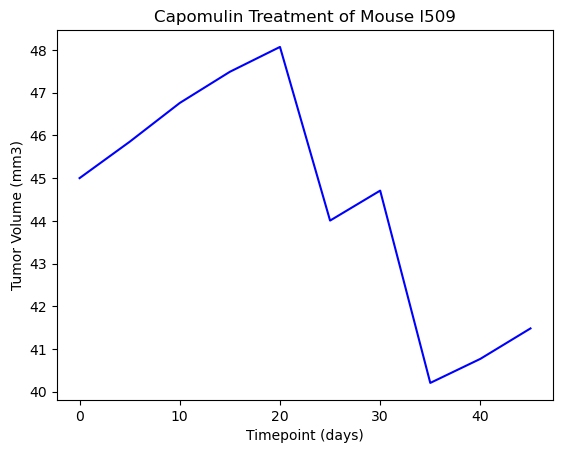

In [18]:
#Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

time = [0, 10, 20, 30, 40]

single_mouse = mouse_study_combined_clean.loc[mouse_study_combined_clean['Mouse ID'] == 'l509',["Timepoint", "Tumor Volume (mm3)"]]

plt.plot(single_mouse['Timepoint'], single_mouse['Tumor Volume (mm3)'],
                        color="blue")

plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

# Show the chart
plt.show()

In [19]:
#create a new dataframe to include average tumor volume per mouse ID

average_tumor_per_mouse = mouse_study_combined_clean.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

average_tumor = pd.DataFrame({"Average Tumor Volume": average_tumor_per_mouse})
average_tumor

,Average Tumor Volume
Mouse ID,
a203,56.312708
a251,55.237095
a262,58.611631
a275,52.770965
a366,54.639906
...,...
z435,46.942214
z578,38.411510
z581,53.979584


In [20]:
#merge average_tumor df with larger df that includes the rest of the data

mouse_df_with_average = pd.merge(new_df_mouse_time, average_tumor, how="left", on=['Mouse ID'])
mouse_df_with_average

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Average Tumor Volume
0,a203,45,67.973419,2,Infubinol,Female,20,23,56.312708
1,a251,45,65.525743,1,Infubinol,Female,21,25,55.237095
2,a262,45,70.717621,4,Placebo,Female,17,29,58.611631
3,a275,45,62.999356,3,Ceftamin,Female,20,28,52.770965
4,a366,30,63.440686,1,Stelasyn,Female,16,29,54.639906
...,...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26,46.942214
244,z578,45,30.638696,0,Ramicane,Male,11,16,38.411510
245,z581,45,62.754451,3,Infubinol,Female,24,25,53.979584
246,z795,45,65.741070,3,Naftisol,Female,13,29,54.880317


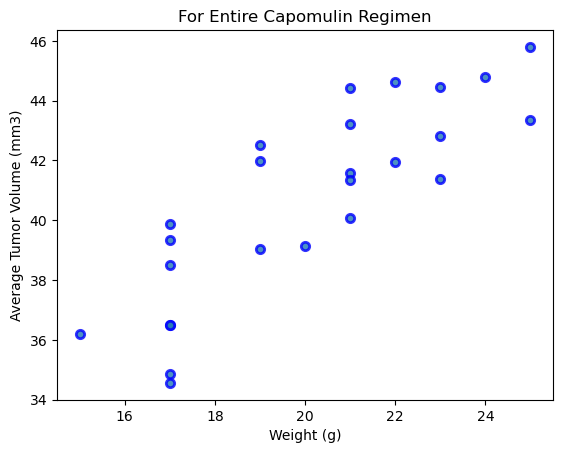

In [60]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

mouse_weight = mouse_df_with_average.loc[mouse_df_with_average['Drug Regimen'] == 'Capomulin',["Weight (g)", 'Average Tumor Volume']]

plt.scatter(mouse_weight['Weight (g)'], mouse_weight['Average Tumor Volume'],
                         alpha=0.8, edgecolors='b', linewidths=2)

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('For Entire Capomulin Regimen')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


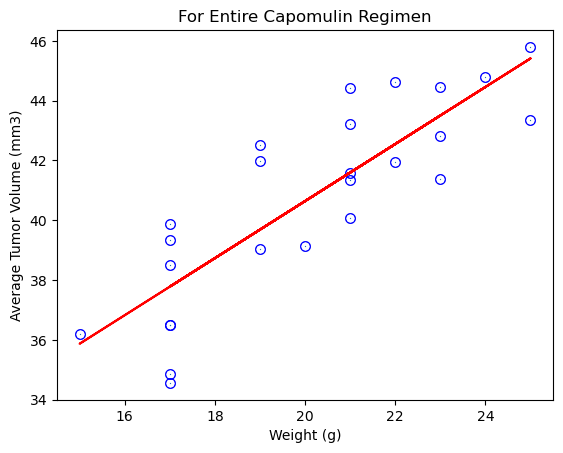

In [61]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#Part 1. ---> correlation coefficient calculation:

print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(mouse_weight['Weight (g)'], mouse_weight['Average Tumor Volume'])[0],2)}")

#Part 2. ---> linear regression model

from scipy.stats import linregress


(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight['Weight (g)'], mouse_weight['Average Tumor Volume'])
regress_values = (mouse_weight['Weight (g)']) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(mouse_weight['Weight (g)'], mouse_weight['Average Tumor Volume'], [round(st.pearsonr(mouse_weight['Weight (g)'], mouse_weight['Average Tumor Volume'])[0],2)],
                         alpha=1, edgecolors='b', linewidths=7)
plt.plot(mouse_weight['Weight (g)'],regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("For Entire Capomulin Regimen")
plt.show()